In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datafile.csv")
df1 = pd.read_csv("datafile (1).csv")
df2 = pd.read_csv("datafile (2).csv")
df3 = pd.read_csv("datafile (3).csv")
df4 = pd.read_csv("produce.csv")

In [3]:
for d in [df, df1, df2, df3]:
    d.columns = d.columns.str.strip()
df2.rename(columns={"Crop             ": "Crop"}, inplace=True)

In [4]:
merged_df = df.merge(df1, on="Crop", how="outer")
merged_df = merged_df.merge(df2, on="Crop", how="outer")
merged_df = merged_df.merge(df3, on="Crop", how="outer")

In [5]:
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head())

Merged DataFrame shape: (184, 33)
    Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
0  ARHAR      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1  ARHAR      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2  ARHAR      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  ARHAR      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4  ARHAR      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-12           State  ...  Area 2010-11  Yield 2006-07  Yield 2007-08  \
0      NaN   Uttar Pradesh  ...           NaN            NaN            NaN   
1      NaN       Karnataka  ...           NaN            NaN            NaN   
2      NaN         Gujarat  ...           NaN            NaN            NaN   
3      NaN  Andhra Pradesh  ...           NaN            NaN            NaN   
4      NaN     Maharashtra  ...           NaN            NaN            NaN   

   Yield 2008-09  Yield 2009-10  Yield 2

In [6]:
merged_df.to_csv("final_merged_data.csv", index=False)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print(merged_df.info())
print(merged_df.describe())
print(merged_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   183 non-null    object 
 1   2004-05                                20 non-null     float64
 2   2005-06                                20 non-null     float64
 3   2006-07                                20 non-null     float64
 4   2007-08                                20 non-null     float64
 5   2008-09                                20 non-null     float64
 6   2009-10                                20 non-null     float64
 7   2010-11                                20 non-null     float64
 8   2011-12                                20 non-null     float64
 9   State                                  49 non-null     object 
 10  Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 11  Cost o

In [9]:
numeric_cols = merged_df.select_dtypes(include='number').columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].median())

Top 10 crops by Production 2010-11:
             Crop  Production 2010-11
164  Total Spices              1790.6
104         Onion               409.1
39    Dry ginger                368.1
147      Soyabean               364.4
9        Banana                 339.4
35   Cotton(lint)               310.8
58       Garlic                 308.2
89          Maize               286.0
87          Maize               286.0
91          Maize               286.0


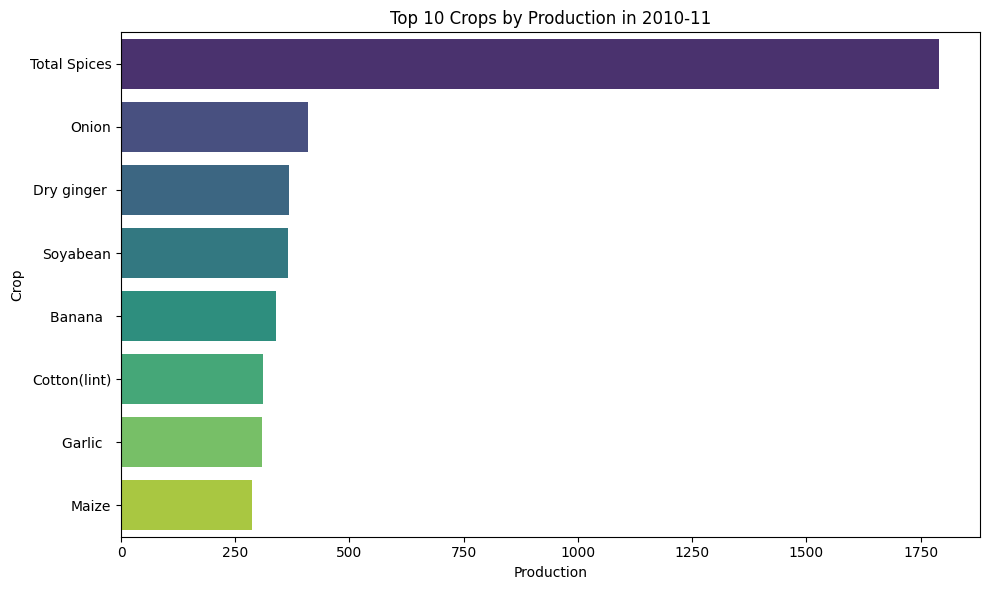

In [10]:
if 'Production 2010-11' in merged_df.columns:
    top_crops = merged_df[['Crop', 'Production 2010-11']].sort_values(by='Production 2010-11', ascending=False).head(10)
    print("Top 10 crops by Production 2010-11:")
    print(top_crops)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_crops, x='Production 2010-11', y='Crop', hue='Crop', palette='viridis', legend=False)
    plt.title('Top 10 Crops by Production in 2010-11')
    plt.xlabel('Production')
    plt.ylabel('Crop')
    plt.tight_layout()
    plt.show()

In [11]:
merged_df.to_csv("cleaned_final_data.csv", index=False)

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
target = "Production 2010-11"
features = merged_df.drop(columns=["Crop", target])

In [14]:
categorical_cols = features.select_dtypes(include="object").columns
for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col].astype(str))

In [15]:
features = features.fillna(0)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, merged_df[target], test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [20]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 254.36
R² Score: 0.10
